### 10-30-2020


# TWEETINSIGHTS - PART 3 - SENTIMENT ANALYSIS

### ALEX MAZZARELLA

### DATA SCIENCE full time course - BrainStation
### CAPSTONE PROJECT

# =============================================================

In this notebook, we will run a sentiment analysis over our text data, the tweets of the users!

The target is to get an idea about the brand perception of the Twitter users that mention or reply to a tweet involving our brand (Netflix), 

As the tweets pulled from the API don't have a sentiment label (positive/neutral/negative), we have two options to proceed:

* manually label a sample of tweets, the train and test a model to get sentiment (polarity) scores of all the dataset
* use a pre-trained model, to directly assign a polarity to each document (tweet)

Due to the time constraint, and keeping in mind the scope of the project (which is to deliver by the deadline a fully functional product that analyzes the sentiment of hte tweets and extracts meaningful topics), we will proceed now with the second option.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt

import nltk
# nltk.download('wordnet', 'vader_lexicon')

# from string import punctuation


In [2]:
# loading in a dataframe cleaned dataset
df_net = pd.read_csv('master_tweets/clean_netflix/clean_netflix.csv')

In [3]:
df_net.head(3)

created_at  followers_count  friends_count           handle  \
0  2020-09-26 15:01:29+00:00              327            570     kaseydrzazga   
1  2020-09-26 15:01:28+00:00              496            294   PlainPotatoTay   
2  2020-09-26 15:01:28+00:00                3             13  dsLdHzRDPbkII4p   

  hashtags  retweet                                              tweet  \
0       []        0  @Spacefunmars @RyanPGoldchains Ahem, @netflix ...   
1       []        0  @charityfaith @netflix @HunterMarch You gotta ...   
2       []        1  Episodes 13 &amp; 14 of "ARASHI's Diary -Voyag...   

              tweet_id                                      user_mentions  
0  1309870714116337664  [{'screen_name': 'Spacefunmars', 'name': 'The ...  
1  1309870713441005568  [{'screen_name': 'charityfaith', 'name': 'Char...  
2  1309870711943487488  [{'screen_name': 'arashi5official', 'name': 'A...

## Labelling tweets

In order to assign a sentiment label to our tweets, I will use 2 pre-trained models, TextBlob and Vader (from NLTK).

The models return a polarity score (they also return other parameters, but we will focus on polarity for now).
Polarity score ranges from -1 for the most negative to 1 for the most positive, with 0 being neutral.

We will then assign the labels:
* -1 for a negative tweet (if the polarity score is < 0 )
*  0 for a neutral tweet (if the polarity score is = 0 )
* 1 for a positive tweet (if the polarity score is > 0 )

Note: during my analysis I tested several conditional statements, to test score thresholds that would make the most sense. 
(For example, do we consider a tweet positive when the score is above 0.5? or 0.333? or above 0?)
This is because by searching on Google what would have been the most effective one, I found discordant opinions.
Unfortunately I have been overwriting my tests, which is something I will not do in the future anymore.

Further down in the notebook I have added a consideration on why I think that the thresholds mentioned above seem to make the most sense.


### **TextBlob**

In [4]:
%%time
# calculating polarities of tweets using TextBlob

df_net["textblob_polarity"] = df_net["tweet"].apply(lambda text: TextBlob(text).sentiment.polarity)

Wall time: 5.44 s


In [5]:
df_net[["tweet", "textblob_polarity"]]

tweet  textblob_polarity
0      @Spacefunmars @RyanPGoldchains Ahem, @netflix ...           0.000000
1      @charityfaith @netflix @HunterMarch You gotta ...           0.000000
2      Episodes 13 &amp; 14 of "ARASHI's Diary -Voyag...          -0.250000
3      Good news! The version of #TheShining on @netf...           0.343750
4        @netflix  that would be cool if you added shrek           0.350000
...                                                  ...                ...
25225  @ItsSativaBlaze @netflix Emily in la Coline du...           0.000000
25226  @MomoaScrunchie @DawnSenate47 @ZeeTeeAy @Tulsi...           0.433333
25227  @aliciakeys @SongExploder @netflix Imagine if ...           0.000000
25228  @PawsWinterfell @danjlevy @netflix @Netflix_CA...           0.500000
25229  When @jonathanmtucker meets Laura on the beach...          -1.000000

[25230 rows x 2 columns]

Great, the model scored each of our tweets. Now, to assign a label, I will write a very simple function.

In [6]:
def polarity_class(x):
    '''
    Used with NLP labelling models for calculating Positive, 
    Negative and Neutral class of input score.
    Returns an integer correspondent to the class which the 
    polarity score belongs to.
    
    Input: polarity score (float)
    
    Output: int value (1 for positive, 0 for neutral, -1 for negative)
    '''
        
    if x > 0:
        return 1
    elif x == 0: 
        return 0
    else:
        return -1

In [7]:
# assigning sentiment labels to each tweet 
df_net["textblob_class"] = df_net['textblob_polarity'].apply(polarity_class)

# checking counts of sentiment classes
df_net["textblob_class"].value_counts()

 1    12439
 0     9105
-1     3686
Name: textblob_class, dtype: int64

In [8]:
df_net.head(3)

created_at  followers_count  friends_count           handle  \
0  2020-09-26 15:01:29+00:00              327            570     kaseydrzazga   
1  2020-09-26 15:01:28+00:00              496            294   PlainPotatoTay   
2  2020-09-26 15:01:28+00:00                3             13  dsLdHzRDPbkII4p   

  hashtags  retweet                                              tweet  \
0       []        0  @Spacefunmars @RyanPGoldchains Ahem, @netflix ...   
1       []        0  @charityfaith @netflix @HunterMarch You gotta ...   
2       []        1  Episodes 13 &amp; 14 of "ARASHI's Diary -Voyag...   

              tweet_id                                      user_mentions  \
0  1309870714116337664  [{'screen_name': 'Spacefunmars', 'name': 'The ...   
1  1309870713441005568  [{'screen_name': 'charityfaith', 'name': 'Char...   
2  1309870711943487488  [{'screen_name': 'arashi5official', 'name': 'A...   

   textblob_polarity  textblob_class  
0               0.00               0  
1               0.00               0  
2              -0.25              -1

Now we have sentiment scores and labels. before moving forward with considerations, let's also get the scores from Vader.

### **NLTKVader**

In [9]:
%%time
# initializing model
sid = SentimentIntensityAnalyzer()

Wall time: 25 ms


In [10]:
%%time
# fitting model
df_net["vader_polarity"] = df_net["tweet"].apply(lambda text: sid.polarity_scores(text)['compound'])

Wall time: 5.65 s


The **Compound** score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
The SID polarity score returns several metrics, but at the moment we are taking into consideration the compound score.

In [11]:
df_net["vader_class"] = df_net['vader_polarity'].apply(polarity_class)


In [12]:
df_net["vader_class"].value_counts()

 1    12450
 0     7571
-1     5209
Name: vader_class, dtype: int64

It seems that the two model return different results in terms of which tweets are neutral or negative.
Let's plot the results from the two models to understand better.

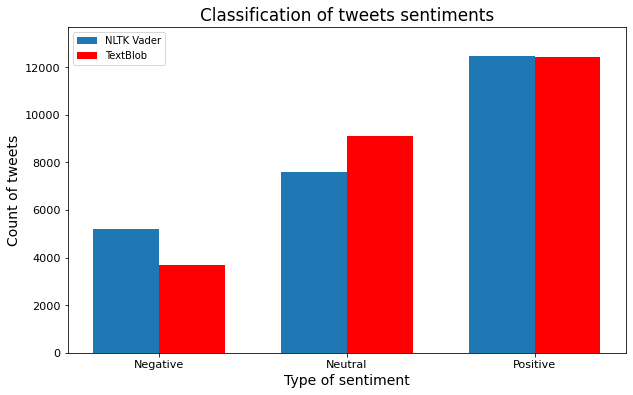

In [13]:
# initializing variables for the plot layouts

# number of 'groups' of bars
N = 3 
# the x locations for the groups of bars
ind = np.arange(N)  
# width of bars
width = 0.35 
# fontsize
fsize = 14

# defining same y max value for both subplots
max_y = max(df_net["vader_class"].value_counts().values.max() *1.1,
            df_net["textblob_class"].value_counts().values.max() *1.1)

plt.figure(figsize = (10,6))

# plotting sentiment scores obtained with Vader model
plt.bar(df_net["vader_class"].value_counts().index, df_net["vader_class"].value_counts().values,
        -width,align = 'edge',label = 'NLTK Vader' )

# plotting sentiment scores obtained with TextBlob
plt.bar(df_net["textblob_class"].value_counts().index, df_net["textblob_class"].value_counts().values,
        width,align = 'edge',color = 'red', label = 'TextBlob' )


plt.legend()
plt.xticks(ticks = [-1,0,1], labels = ['Negative','Neutral','Positive'],  fontsize = fsize *0.8)
plt.yticks(fontsize = fsize *0.8)
plt.xlabel('Type of sentiment', fontsize = fsize)
plt.ylabel('Count of tweets', fontsize = fsize)
plt.ylim(0,max_y)
plt.title('Classification of tweets sentiments', fontsize = fsize*1.2)


plt.show()

We can see that the two models have some disagreement on the negative and neutral classes, but are quite aligned on the positive.

However, from what we observe, about ~50% of the tweets around our brand are positive!

Let's remember for a moment on how the sentiment classes have been assigned, based on the polarity scores:
* if score > 0 --> positive
* if score = 0 --> neutral
* if score > 0 --> negative

As anticipated, I chose those classes thresholds.
Because of that, what I would like to check is if the results of such conditional statement give us a fair representation of the original data (the float polarity score).

To do so, I will plot the polarity scores, resulted from both models, in a histogram.

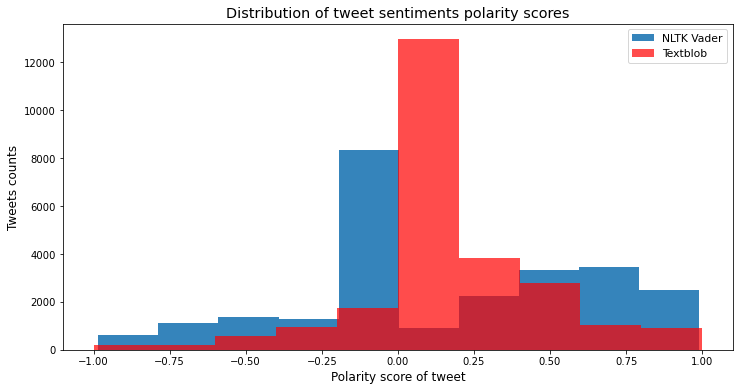

In [40]:
# plotting histogram with polarity scores - Vader and textblob
fsize = 12

plt.figure(figsize = (12,6))
plt.hist(df_net["vader_polarity"], alpha = 0.9, label = 'NLTK Vader')
plt.hist(df_net["textblob_polarity"], alpha = 0.7, color = 'red', label = 'Textblob')
plt.legend(fontsize = fsize*.9)
plt.ylabel('Tweets counts', fontsize = fsize)
plt.xlabel('Polarity score of tweet', fontsize = fsize)
plt.title('Distribution of tweet sentiments polarity scores', fontsize = fsize*1.2)
plt.show()

Looking at the histogram above, it appears that:

* more tweets have received a negative polarity score with Vader rather than with Textblob.

* positive scores seems quite balanced: Vader assigned more high positive scores ( > +0.75) and Textblob lower positive scores.

For both models, the highest frequencies of scores are those around the zero. That includes not only the neutral sentiments (score 0) but also the 'slightly' positive and negatives, with a polarity score close to zero.

That said, I would assume that the conditional statement used to assign each polarity score to the different classes of sentiment (positive, negative, neutral) is a fairly representing the distribution of scores. 

As mentioned, both models returned similar overall scores for the positive tweets, with some differences in the other two classes.
If we had to pick one, observing the histogram above, I would choose TexBlob, based on the fact that the distribution of the scores seems vaguely more close to a normalized (left skewed with a very tight bell) than the one given by Vader. 
However, for the next step that we will take in this analysis, this might not be extremely relevant.

In [15]:
# distribution percentages of polarity scores returned from TextBlob
round(df_net['textblob_class'].value_counts() / df_net.shape[0] *100, 2)

 1    49.30
 0    36.09
-1    14.61
Name: textblob_class, dtype: float64

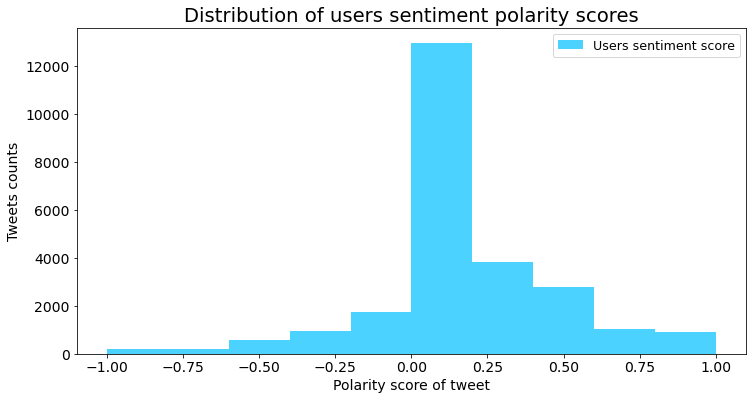

In [16]:
####### visualization of polarity scores distribution from TextBlob


# plotting histogram with polarity scores - Vader and textblob

# setting fontsize for labels and title
fsize = 14

plt.figure(figsize = (12,6))
plt.hist(df_net["textblob_polarity"], alpha = 0.7, color = 'deepskyblue', label = 'Users sentiment score')

plt.legend(fontsize = fsize*.9)

plt.ylabel('Tweets counts', fontsize = fsize)
plt.xlabel('Polarity score of tweet', fontsize = fsize)

plt.title('Distribution of users sentiment polarity scores', fontsize = fsize*1.4)

plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)

plt.show()

### Checking sentiment over time

Let's take one more step in our analysis to check if and how the average sentiment changes over time.

We will calculate a moving average and plot it.

As a reminder, we are using the polarity scores returned by TextBlob.

In [17]:
# convert created_at to date time
df_net['created_at'] = pd.to_datetime(df_net['created_at']) 

In [18]:
# calculating moving averages of TextBlob polarity scores

# creating array with dates
dates = np.array(df_net['created_at'])
# initializing array of indexes for sorted dates
indexes = np.argsort(dates)
# setting window of number of tweets per moving average
window = 1000
# setting dates to plot, starting with offset equal to window 
dates = dates[indexes][window:]
# the polarity scores 
values = np.array(df_net['textblob_polarity'])[indexes]
windows = pd.Series(values).rolling(window)
# calculating moving averages (offset = to window size)
mov_avgs = windows.mean()[window:]

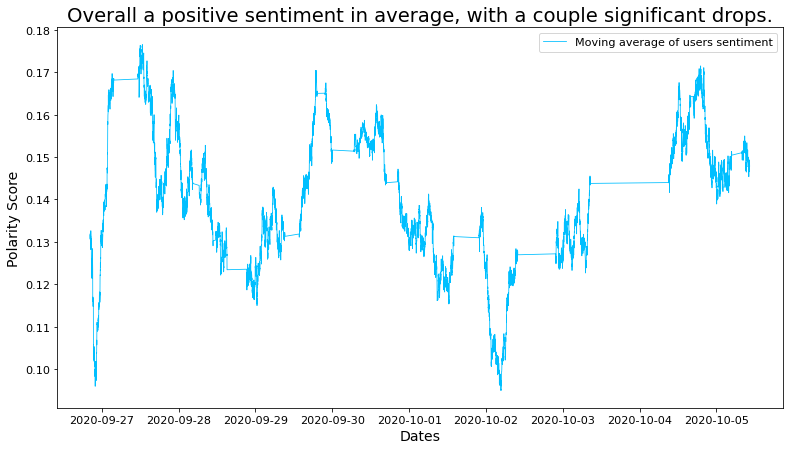

Wall time: 494 ms


In [19]:
%%time

# fontsize for labels, legend, ticks and title
fsize = 14

# plotting the moving average
plt.figure(figsize=(13,7))
plt.plot(dates, mov_avgs, color='deepskyblue', label='Moving average of users sentiment', lw = 0.8)

# plt.axhline(y = df_net['textblob_polarity'].mean(), color = 'gold', label = 'Overall average sentiment')
plt.legend(fontsize = fsize*0.8)

plt.ylabel('Polarity Score', fontsize = fsize)
plt.xlabel('Dates', fontsize = fsize)

plt.title('Overall a positive sentiment in average, with a couple significant drops.', fontsize = fsize*1.4)

plt.xticks(fontsize = fsize*0.8)
plt.yticks(fontsize = fsize*0.8)

plt.show()

In [20]:
df_net.to_csv('tableau_visualizations/data/tweets_w_sentiment.csv', index = False)

**Considerations**

* The overall average sentiment has been positive during the whole data observation period. 

* We noticed a couple significant drops on Sep 27 and October 2. It is recommendable to investigate what are the potential reasons for that. For example, from a quick search, we found that on September 27, Fox Turkey announced the cancellation of the series 'Bay Yanlis'. We will see later in the analysis that this has been also a very hot topic in that period.

* Cross matching the periods of sentiment drop with events or announcements, might give precious insights about preferences and interests of the followers, and help for current and future decisions.

* Let's also keep in mind that to represent the changes over time, the y axis in the plot above ranges from 0.09 to 0.18. It means that all the average scores represented are within a 0.9 range. That is to say, small fluctuations of 0.01 might visually appear more relevant thatn they actually are.

* The flat horizontal lines, represent periods in which data was not collected (i.e. I had no internet access, or I had to use the full computation power of my machine for other assignments).


As a future improvement, I would like to train and fit a sentiment analysis model, using Twitter text data for the labelling and training.

In fact, by using a pre trained model, there are a few downsides, including
* text data used to train the model. The language used in a scientific paper or an online magazine might be significantly different from users posts in a social media platform. I would like to explore if using tweets to train the model, would then return different results (i.e. there are type-os, slang expressions, abbrevaited expressions, that might not be in the dictionary).
* I have not been able to find a way to score the accuracy of the model. (Note that this would anyway require to pre-label a consistent amount of tweets).




In the next section of the project we will proceed with an analysis to extract the most discussed/engaging topics. 